In [19]:
import os

base_dir ='Animal'
# Change the base_dir to where you put dataset

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation']

Contents of train directory:
['cats', 'dogs', 'hens']

Contents of validation directory:
['cats', 'dogs', 'hens']


In [20]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_hen_dir = os.path.join(train_dir, 'hens')
# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_hen_dir = os.path.join(validation_dir, 'hens')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['cats', 'dogs', 'hens']

Contents of validation directory:
['cats', 'dogs', 'hens']


In [21]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
train_hen_fnames = os.listdir( train_hen_dir )
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print(train_hen_fnames[:10])
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total training hen images :', len(os.listdir( train_hen_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))
print('total validation hen images :', len(os.listdir( validation_hen_dir ) ))

['1.jpeg', '10.jpeg', '100.jpeg', '1000.jpeg', '101.jpeg', '102.jpeg', '103.jpeg', '104.jpeg', '105.jpeg', '106.jpeg']
['1.jpeg', '10.jpeg', '100.jpeg', '1000.jpeg', '101.jpeg', '102.jpeg', '103.jpeg', '104.jpeg', '105.jpeg', '106.jpeg']
['1.jpeg', '10.jpeg', '100.jpeg', '1000.jpeg', '101.jpeg', '102.jpeg', '103.jpeg', '104.jpeg', '105.jpeg', '106.jpeg']
total training cat images : 1000
total training dog images : 1000
total training hen images : 1000
total validation cat images : 500
total validation dog images : 500
total validation hen images : 500


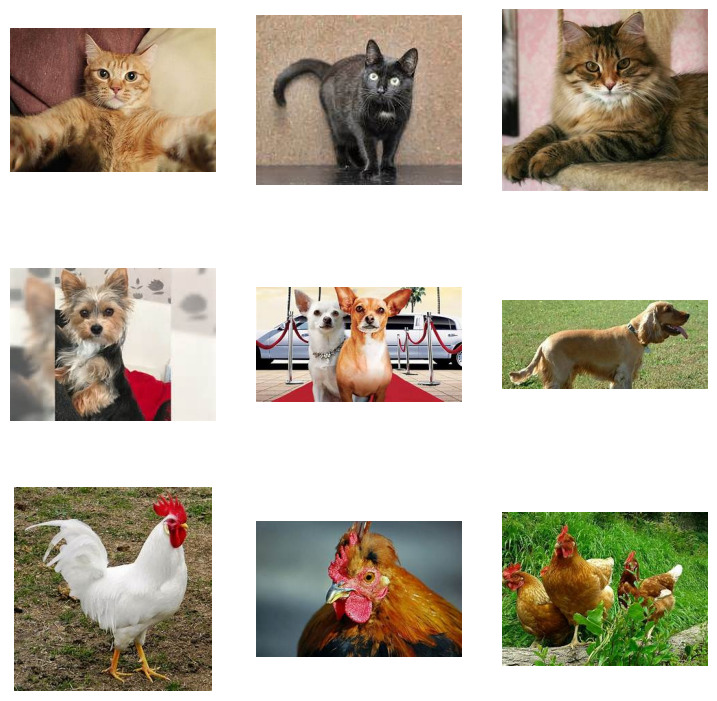

In [22]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 3
ncols = 3
pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)
pic_index+=3
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-3:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[ pic_index-3:pic_index]]
next_hen_pix = [os.path.join(train_hen_dir, fname)
                for fname in train_hen_fnames[ pic_index-3:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix+next_hen_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [26]:
# Phân tích dữ liệu ảnh đầu vào thành các ma trận số nguyên

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir, # This is the source directory for training images
        target_size=(150, 150), # All images will be resized to 150x150
        batch_size=3000, # Flow training images in batches of 128 using train_datagen generator
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
# Flow validation images in batches of 128 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=3000,
        class_mode='categorical')

print(train_generator.class_indices)
print(validation_generator.class_indices)

Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
{'cats': 0, 'dogs': 1, 'hens': 2}
{'cats': 0, 'dogs': 1, 'hens': 2}


In [27]:
x_train, y_train = train_generator.next()
x_val, y_val = validation_generator.next()
print(x_train.shape)
print(y_train.shape)

(3000, 150, 150, 3)
(3000, 3)


In [30]:
len(x_train)

3000

# Cách khác

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# path to the database - change it if needed
path = 'Animal\\validation\\dogs\\'

surfix = '.jpeg' #file extension is png

# open one picture to get the image's size
fn = '501' + surfix
im = cv2.imread(path + fn, cv2.IMREAD_COLOR)
print(im.reshape(-1).shape)

# get image size
h, w, c = im.shape  # height, width, channel

D = h * w * c  # dimension of each data point
print(D, h, w)

X = np.zeros((D, 500))  # initialize data matrix X

cnt = 0
# read all images and reshape to be a vector
for i in range(501, 1001):
    fn = str(i) + surfix
    im = cv2.imread(path + fn, cv2.IMREAD_COLOR)
    if (im.reshape(-1).shape[0] != D):
        im
    X[:, cnt] = im.reshape(-1)
    cnt += 1

# remove the first column
X = X[:, 1:]

# # Doing PCA, note that each row is a datapoint
# from sklearn.decomposition import PCA
#
# # remain dim. k = 150 - change it!
# pca = PCA(n_components=150)
#
# # then apply to data X
# pca.fit(X.T)
#
# # then build projection matrix
# U = pca.components_.T


# # then reshape new dataset (reduced dim.) to be new images and save
# # path to save reduced dim. images
# path_save = 'C:\\Users\\thanhsen\\Notebooks\\MachineLearning\\w7\\dim150\\'
# for i in range(U.shape[1]):
#     plt.axis('off')
#     f1 = plt.imshow(U[:, i].reshape(h, w), interpolation='nearest')
#     f1.axes.get_xaxis().set_visible(False)
#
#     plt.gray()
#     fn = path_save + 'eigenface' + str(i).zfill(2) + '.png'
#     plt.savefig(fn, bbox_inches='tight', pad_inches=0)
#
# # test results by showing some images
# # See reconstruction of first 6 persons
# for person_id in range(1, 7):
#     for state in ['centerlight']:
#         fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
#         im = cv2.imread(fn,0)
#         plt.axis('off')
#
#         f1 = plt.imshow(im, interpolation='nearest')
#         f1.axes.get_xaxis().set_visible(False)
#         plt.gray()
#         fn = 'ori' + str(person_id).zfill(2) + '.png'
#         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
#         plt.show()
#
#         # reshape and subtract mean, don't forget
#         x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)
#
#         # encode
#         z = U.T.dot(x)
#
#         #decode
#         x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)
#
#         # reshape to orginal dim
#         im_tilde = x_tilde.reshape(h, w)
#         plt.axis('off')
#
#         f1 = plt.imshow(im_tilde, interpolation='nearest')
#         f1.axes.get_xaxis().set_visible(False)
#         plt.gray()
# #        fn = 'res' + str(person_id).zfill(2) + '.png'
# #        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
#         plt.show()

(202500,)
202500 225 300


ValueError: could not broadcast input array from shape (152100,) into shape (202500,)

# Cách 3